In [18]:
#导包
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential#该模型可以构建非常复杂的神经网络
from keras.layers import Dense#Dense为定义网络层的基本方法
from sklearn.model_selection import train_test_split#train_test_split用来随机划分训练集和测试集
import matplotlib.pyplot as plt#其为python上一个二维绘图库
plt.rcParams['font.sans-serif']=['SimHei'] #设置字体
plt.rcParams['axes.unicode_minus']=False #字符显示

In [19]:
df = pd.read_csv("C:/Users/Administrator/Desktop/mortality.csv")#读取文件

In [20]:
df1 = df.copy()#将df的值赋值给df1

In [21]:
#归一化：将数据缩放到（0,1）范围内
df1.loc[:,'year'] = (df1.loc[:,'year']-1995)/(2017-1995)
df1.loc[:,'age'] = (df1.loc[:,'age']-0)/(100-0)
df1.loc[:,'region'] = (df1.loc[:,'region']-1)/(4-1)

In [22]:
#分为训练集和测试集
train_X,test_X,train_y,test_y = train_test_split(df1.iloc[:,0:4],df1.iloc[:,4],test_size=0.2)

In [23]:
train_X,test_X,train_y,test_y 

(          year   age  gender    region
 2444  0.590909  0.05       0  1.000000
 3170  0.818182  0.05       1  0.000000
 3878  1.000000  0.25       1  0.000000
 2291  0.590909  0.10       1  0.000000
 3121  0.772727  0.90       0  0.333333
 ...        ...   ...     ...       ...
 2941  0.727273  0.70       0  0.333333
 3177  0.818182  0.40       1  0.000000
 3489  0.863636  0.60       0  0.666667
 638   0.136364  0.00       0  0.333333
 2818  0.727273  0.05       1  0.000000
 
 [3238 rows x 4 columns],           year   age  gender    region
 2479  0.636364  0.70       1  0.000000
 1495  0.363636  1.00       1  1.000000
 3733  0.954545  0.70       1  0.333333
 172   0.000000  0.85       0  1.000000
 192   0.045455  0.75       1  0.000000
 ...        ...   ...     ...       ...
 1591  0.409091  0.30       1  0.000000
 3098  0.772727  0.85       0  0.000000
 1824  0.454545  0.95       1  0.666667
 1665  0.409091  0.70       1  1.000000
 825   0.181818  0.50       0  0.333333
 
 [810 rows 

In [24]:
#搭建模型
model = Sequential()#定义一个序贯模型
model.add(Dense(32, activation='relu', input_shape=(4,)))#将第一个全连接层添加到模型中，该层有32个神经元，激活函数为relu，输入是四维向量
model.add(Dense(units=128, activation = 'relu'))#添加第二个全连接层，该层有128个神经元，激活函数为relu
model.add(Dense(units=1, activation = 'linear'))#添加第三个全连接层，该层有1个神经元，激活函数为linear
model.compile(loss='mse',optimizer='RMSprop')#选择损失函数和优化方法，mse是均方根误差，模型优化器为RMSprop
model.fit(train_X, train_y, batch_size=128, epochs=1000, validation_data=(test_X,test_y))
#训练集进行训练，测试集进行验证，每次梯度更新样本数为128，运行1000个周期

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 3238 samples, validate on 810 samples
Epoch 1/1000
3238/3238 [==============================] - 0s 44us/step - loss: 20.9291 - val_loss: 12.2170
Epoch 2/1000
3238/3238 [==============================] - 0s 13us/step - loss: 9.6889 - val_loss: 7.7464
Epoch 3/1000
3238/3238 [==============================] - 0s 12us/step - loss: 6.6740 - val_loss: 5.2387
Epoch 4/1000
3238/3238 [==============================] - 0s 13us/step - loss: 4.2204 - val_loss: 3.1905
Epoch 5/1000
3238/3238 [==============================] - 0s 13us/step - loss: 2.5338 - val_loss: 2.3688
Epoch 6/1000
3238/3238 [==============================] - 0s 14us/step - loss: 1.8514 - val_loss: 1.8048
Epoch 7/1000
3238/3238 [==============================] - 0s 16us/step - loss: 1.5404 - val_loss: 1.4726
Epoch 8/1000
3238/3238 [==============================] - 0s 16us/step - loss: 1.3349 - val_loss

3238/3238 [==============================] - 0s 15us/step - loss: 0.2832 - val_loss: 0.3249
Epoch 74/1000
3238/3238 [==============================] - 0s 18us/step - loss: 0.2877 - val_loss: 0.2511
Epoch 75/1000
3238/3238 [==============================] - 0s 12us/step - loss: 0.2809 - val_loss: 0.2812
Epoch 76/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.2793 - val_loss: 0.2670
Epoch 77/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.2768 - val_loss: 0.2354
Epoch 78/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.2687 - val_loss: 0.2904
Epoch 79/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.2701 - val_loss: 0.2656
Epoch 80/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.2793 - val_loss: 0.3437
Epoch 81/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.2601 - val_loss: 0.2410
Epoch 82/1000
3238/3238 [==============================] - 0

Epoch 150/1000
3238/3238 [==============================] - 0s 29us/step - loss: 0.1945 - val_loss: 0.1744
Epoch 151/1000
3238/3238 [==============================] - 0s 16us/step - loss: 0.2041 - val_loss: 0.1574
Epoch 152/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1846 - val_loss: 0.1463
Epoch 153/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1910 - val_loss: 0.2292
Epoch 154/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1916 - val_loss: 0.1649
Epoch 155/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1889 - val_loss: 0.2315
Epoch 156/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1794 - val_loss: 0.2360
Epoch 157/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1881 - val_loss: 0.1493
Epoch 158/1000
3238/3238 [==============================] - 0s 23us/step - loss: 0.1838 - val_loss: 0.2183
Epoch 159/1000
3238/3238 [===========

3238/3238 [==============================] - ETA: 0s - loss: 0.145 - 0s 21us/step - loss: 0.1465 - val_loss: 0.1158
Epoch 227/1000
3238/3238 [==============================] - 0s 25us/step - loss: 0.1538 - val_loss: 0.1705
Epoch 228/1000
3238/3238 [==============================] - 0s 15us/step - loss: 0.1477 - val_loss: 0.2135
Epoch 229/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1532 - val_loss: 0.1079
Epoch 230/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1543 - val_loss: 0.1286
Epoch 231/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1479 - val_loss: 0.1605
Epoch 232/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1461 - val_loss: 0.1058
Epoch 233/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1542 - val_loss: 0.1012
Epoch 234/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1421 - val_loss: 0.1792
Epoch 235/1000
3238/3238 [==

3238/3238 [==============================] - 0s 10us/step - loss: 0.1371 - val_loss: 0.1952
Epoch 303/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1391 - val_loss: 0.1228
Epoch 304/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1469 - val_loss: 0.1299
Epoch 305/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1452 - val_loss: 0.1236
Epoch 306/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1390 - val_loss: 0.1248
Epoch 307/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1405 - val_loss: 0.0978
Epoch 308/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1396 - val_loss: 0.1257
Epoch 309/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1439 - val_loss: 0.1227
Epoch 310/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1390 - val_loss: 0.1794
Epoch 311/1000
3238/3238 [==========================

3238/3238 [==============================] - 0s 10us/step - loss: 0.1441 - val_loss: 0.1079
Epoch 379/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1355 - val_loss: 0.1725
Epoch 380/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1361 - val_loss: 0.1124
Epoch 381/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1334 - val_loss: 0.1914
Epoch 382/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1360 - val_loss: 0.1223
Epoch 383/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1353 - val_loss: 0.1272
Epoch 384/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1250 - val_loss: 0.2657
Epoch 385/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1429 - val_loss: 0.0986
Epoch 386/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1409 - val_loss: 0.1315
Epoch 387/1000
3238/3238 [==========================

3238/3238 [==============================] - 0s 11us/step - loss: 0.1340 - val_loss: 0.0977
Epoch 455/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1298 - val_loss: 0.1488
Epoch 456/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1341 - val_loss: 0.1472
Epoch 457/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1354 - val_loss: 0.0967
Epoch 458/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1213 - val_loss: 0.1792
Epoch 459/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1389 - val_loss: 0.1546
Epoch 460/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1286 - val_loss: 0.0963
Epoch 461/1000
3238/3238 [==============================] - 0s 9us/step - loss: 0.1341 - val_loss: 0.1182
Epoch 462/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1247 - val_loss: 0.1372
Epoch 463/1000
3238/3238 [===========================

3238/3238 [==============================] - 0s 11us/step - loss: 0.1277 - val_loss: 0.1057
Epoch 531/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1309 - val_loss: 0.1153
Epoch 532/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1332 - val_loss: 0.0984
Epoch 533/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1288 - val_loss: 0.1471
Epoch 534/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1313 - val_loss: 0.1374
Epoch 535/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1307 - val_loss: 0.1215
Epoch 536/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1346 - val_loss: 0.1655
Epoch 537/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1234 - val_loss: 0.1001
Epoch 538/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1325 - val_loss: 0.1449
Epoch 539/1000
3238/3238 [==========================

3238/3238 [==============================] - 0s 11us/step - loss: 0.1297 - val_loss: 0.1005
Epoch 607/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1292 - val_loss: 0.1279
Epoch 608/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1278 - val_loss: 0.1011
Epoch 609/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1210 - val_loss: 0.2001
Epoch 610/1000
3238/3238 [==============================] - 0s 9us/step - loss: 0.1318 - val_loss: 0.1537
Epoch 611/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1234 - val_loss: 0.1138
Epoch 612/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1306 - val_loss: 0.1365
Epoch 613/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1269 - val_loss: 0.1022
Epoch 614/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1285 - val_loss: 0.1377
Epoch 615/1000
3238/3238 [===========================

3238/3238 [==============================] - 0s 11us/step - loss: 0.1208 - val_loss: 0.0926
Epoch 683/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1212 - val_loss: 0.1569
Epoch 684/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1311 - val_loss: 0.1567
Epoch 685/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1246 - val_loss: 0.0981
Epoch 686/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1188 - val_loss: 0.2542
Epoch 687/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1297 - val_loss: 0.1152
Epoch 688/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1267 - val_loss: 0.1510
Epoch 689/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1256 - val_loss: 0.0998
Epoch 690/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1277 - val_loss: 0.1262
Epoch 691/1000
3238/3238 [==========================

3238/3238 [==============================] - 0s 13us/step - loss: 0.1206 - val_loss: 0.1287
Epoch 759/1000
3238/3238 [==============================] - 0s 13us/step - loss: 0.1306 - val_loss: 0.0946
Epoch 760/1000
3238/3238 [==============================] - 0s 13us/step - loss: 0.1228 - val_loss: 0.1683
Epoch 761/1000
3238/3238 [==============================] - 0s 13us/step - loss: 0.1220 - val_loss: 0.1064
Epoch 762/1000
3238/3238 [==============================] - 0s 12us/step - loss: 0.1234 - val_loss: 0.1838
Epoch 763/1000
3238/3238 [==============================] - 0s 12us/step - loss: 0.1251 - val_loss: 0.0983
Epoch 764/1000
3238/3238 [==============================] - 0s 13us/step - loss: 0.1248 - val_loss: 0.1291
Epoch 765/1000
3238/3238 [==============================] - 0s 13us/step - loss: 0.1205 - val_loss: 0.1197
Epoch 766/1000
3238/3238 [==============================] - 0s 13us/step - loss: 0.1217 - val_loss: 0.1010
Epoch 767/1000
3238/3238 [==========================

3238/3238 [==============================] - 0s 10us/step - loss: 0.1180 - val_loss: 0.1095
Epoch 835/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1173 - val_loss: 0.1710
Epoch 836/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1205 - val_loss: 0.1053
Epoch 837/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1179 - val_loss: 0.1387
Epoch 838/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1206 - val_loss: 0.0912
Epoch 839/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1200 - val_loss: 0.1709
Epoch 840/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1190 - val_loss: 0.2115
Epoch 841/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1247 - val_loss: 0.1304
Epoch 842/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1248 - val_loss: 0.1043
Epoch 843/1000
3238/3238 [==========================

3238/3238 [==============================] - 0s 10us/step - loss: 0.1176 - val_loss: 0.1763
Epoch 911/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1223 - val_loss: 0.1347
Epoch 912/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1187 - val_loss: 0.1187
Epoch 913/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1172 - val_loss: 0.1178
Epoch 914/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1134 - val_loss: 0.1936
Epoch 915/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1225 - val_loss: 0.1024
Epoch 916/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1232 - val_loss: 0.1124
Epoch 917/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1129 - val_loss: 0.1144
Epoch 918/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1193 - val_loss: 0.1474
Epoch 919/1000
3238/3238 [==========================

3238/3238 [==============================] - 0s 11us/step - loss: 0.1147 - val_loss: 0.0957
Epoch 987/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1151 - val_loss: 0.1819
Epoch 988/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1170 - val_loss: 0.0980
Epoch 989/1000
3238/3238 [==============================] - 0s 12us/step - loss: 0.1148 - val_loss: 0.0985
Epoch 990/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1165 - val_loss: 0.0895
Epoch 991/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1176 - val_loss: 0.1275
Epoch 992/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1122 - val_loss: 0.1029
Epoch 993/1000
3238/3238 [==============================] - 0s 10us/step - loss: 0.1143 - val_loss: 0.0943
Epoch 994/1000
3238/3238 [==============================] - 0s 11us/step - loss: 0.1157 - val_loss: 0.1180
Epoch 995/1000
3238/3238 [==========================

In [7]:
#定义画图函数
def predict_true_plot(year,gender,region):
    predict_x = df.loc[(df['year']==year)&(df['gender']==gender)&(df['region']==region),['year','age','gender','region']]
    predict_x.loc[:,'year'] = (predict_x.loc[:,'year']-1995)/(2017-1995)
    predict_x.loc[:,'age'] = (predict_x.loc[:,'age']-0)/(100-0)
    predict_x.loc[:,'region'] = (predict_x.loc[:,'region']-1)/(4-1)
    true_y = df.loc[(df['year']==year)&(df['gender']==gender)&(df['region']==region),'y'].values
    predict_y = []
    for i in range(0,22):
        predict_y.append(model.predict(predict_x.iloc[i,:].values.reshape(1,4))[0,0])
    fig,ax = plt.subplots(figsize=(12,8))
    ax.plot(true_y,label='实际值')
    ax.plot(predict_y,label='拟合值')
    ax.legend(fontsize=16)
    ax.set_xticks([0,4,8,12,16,20])
    ax.set_xticklabels([ 0, 15, 35, 55, 75, 95])
    ax.set_yticks([-1,-3,-5,-7,-9])
    ax.set_yticklabels([-1,-3,-5,-7,-9])
    for ticklabel in ax.get_xticklabels() + ax.get_yticklabels():
        ticklabel.set_fontsize(13)
    ax.set_xlabel('年龄',fontsize=14)
    ax.set_ylabel('死亡率(对数值)',fontsize=14)
    gender_dict = {0:'男',1:'女'}
    region_dict = {1:'全国',2:'城市',3:'乡镇',4:'农村'}
    ax.set_title('%s年%s%s性全年龄组死亡率'% (year,region_dict[region],gender_dict[gender]),fontsize=16)

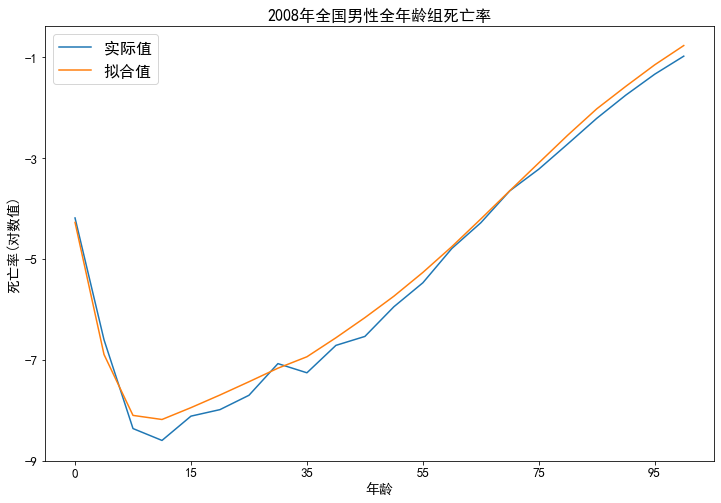

In [8]:
#第一个参数为年 1995-2017   第二个参数为性别 0，1  第三个参数为地区 1，2，3，4  可任选
predict_true_plot(2008,0,1)